In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [20]:
# cd C:\Users\user\Desktop\Python\Crawling\따릉이

In [21]:
#구로구 대여소만 뽑아오기
df2 = pd.read_csv('서울시 따릉이대여소 마스터 정보.csv',encoding='euc-kr')
df2['주소1'] = df2['주소1'].fillna('서울특별시 동작구')

In [22]:
df2

,대여소_ID,주소1,주소2,위도,경도
0,ST-999,서울특별시 양천구 목동서로 280,목동아파트 8단지 상가동,0.000000,0.000000
1,ST-998,서울특별시 양천구 목동서로 130,목동아파트 4단지 상가동,0.000000,0.000000
2,ST-997,서울특별시 양천구 목동중앙로 49,목동3단지 시내버스정류장,37.534390,126.869598
3,ST-996,서울특별시 양천구 남부순환로88길5-16,양강중학교앞 교차로,37.524334,126.850548
4,ST-995,서울특별시 양천구 신정동 621-14,계남공원 입구 주출입구 좌측,37.510681,126.857399
...,...,...,...,...,...
3151,ST-1002,서울특별시 양천구 목동동로 316-6,서울시 도로환경관리센터,37.529900,126.876541
3152,ST-1001,서울특별시 양천구 남부순환로4길20,서서울호수공원,0.000000,0.000000
3153,ST-1000,서울특별시 양천구 신정동 236,서부식자재마트 건너편,37.510380,126.866798
3154,ST-100,서울특별시 광진구 아차산로 262,더샵스타시티 C동 앞,37.536667,127.073593


In [11]:
for i in df2['주소1']:
    if i.split()[1] =='구로구':
        pass
    else:
        df2.drop(index = df2[df2['주소1']==i].index, inplace= True)

In [12]:
url = 'https://www.weather.go.kr/plus/land/current/past_table.jsp'
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [13]:

data = []
for i in range(1,32):
    df_test = pd.read_csv(f'./새 폴더/tpss_bcycl_od_statnhm_202207{str(i).zfill(2)}.csv', encoding='euc-kr')
    df_all = pd.merge(df_test,df2,left_on='시작_대여소', right_on='대여소_ID')

    for s in df_all['시작_대여소'].unique():
        df_all.loc[df_all['시작_대여소'] == s, '대여소_전체_건수'] = df_all[df_all['시작_대여소'] == s]['전체건수'].sum()
        
        
    df_all.drop_duplicates(['시작_대여소'], keep='first', inplace = True)
    df_all.drop(['기준_시간','종료_대여소','전체건수','전체_이용_분','전체_이용_거리','주소2','대여소_ID'],axis=1, inplace= True)
    
    

    for f in range(len(df_all)):
        data.append(df_all.iloc[f].to_list())
col_name = list(df_all.columns)

In [14]:
col_name

['기준_날짜', '시작_대여소', '주소1', '위도', '경도', '대여소_전체_건수']

In [15]:
df = pd.DataFrame(data, columns = col_name)

In [16]:
df['기준_날짜'] = pd.to_datetime(df['기준_날짜'], format='%Y%m%d')

In [17]:
df

,기준_날짜,시작_대여소,주소1,위도,경도,대여소_전체_건수
0,2022-07-01,ST-668,서울특별시 구로구 시흥대로 577-2,37.484940,126.901321,822.0
1,2022-07-01,ST-1964,서울특별시 구로구 경인로 673-1 가로판매대,37.510063,126.889565,414.0
2,2022-07-01,ST-675,서울특별시 구로구 경인로 430,37.499470,126.868401,88.0
3,2022-07-01,ST-918,서울특별시 구로구 도림천로 351,37.494404,126.894447,252.0
4,2022-07-01,ST-920,서울특별시 구로구 경인로40길 47,37.494995,126.858253,94.0
...,...,...,...,...,...,...
3224,2022-07-31,ST-1962,서울특별시 구로구 고척동 60-42,37.504520,126.870552,6.0
3225,2022-07-31,ST-1947,서울특별시 구로구 항동 100-14,37.480629,126.821815,2.0
3226,2022-07-31,ST-1948,서울 구로구 항동 100-5,37.480808,126.821907,2.0
3227,2022-07-31,ST-1955,서울특별시 구로구 부광로 96-16 항동 제일풍경채 포레스트,37.476036,126.816589,2.0


In [10]:
from matplotlib import pyplot as plt

In [11]:
# plt.plot(x = df['온도'] , y = df['대여소_전체_건수'])

In [12]:
import seaborn as sns

In [13]:
df

,기준_날짜,시작_대여소,주소1,대여소_전체_건수,온도
0,2022-07-01,ST-668,서울특별시 구로구 시흥대로 577-2,822.0,26.6
1,2022-07-01,ST-1964,서울특별시 구로구 경인로 673-1 가로판매대,414.0,26.6
2,2022-07-01,ST-675,서울특별시 구로구 경인로 430,88.0,26.6
3,2022-07-01,ST-918,서울특별시 구로구 도림천로 351,252.0,26.6
4,2022-07-01,ST-920,서울특별시 구로구 경인로40길 47,94.0,26.6
...,...,...,...,...,...
3224,2022-07-31,ST-1962,서울특별시 구로구 고척동 60-42,6.0,27.2
3225,2022-07-31,ST-1947,서울특별시 구로구 항동 100-14,2.0,27.2
3226,2022-07-31,ST-1948,서울 구로구 항동 100-5,2.0,27.2
3227,2022-07-31,ST-1955,서울특별시 구로구 부광로 96-16 항동 제일풍경채 포레스트,2.0,27.2


In [14]:
df['온도'] = df['온도'].astype(float)

In [15]:
df4 = df.groupby(['기준_날짜','온도'])['대여소_전체_건수'].mean().reset_index()

In [16]:
df4

,기준_날짜,온도,대여소_전체_건수
0,2022-07-01,26.6,120.653846
1,2022-07-02,28.8,94.211538
2,2022-07-03,29.3,83.165049
3,2022-07-04,29.3,116.400000
4,2022-07-05,29.2,114.152381
5,2022-07-06,29.5,106.609524
6,2022-07-07,28.2,89.038462
7,2022-07-08,25.8,110.285714
8,2022-07-09,26.9,94.269231
9,2022-07-10,29.2,83.000000


<AxesSubplot:xlabel='기준_날짜', ylabel='대여소_전체_건수'>

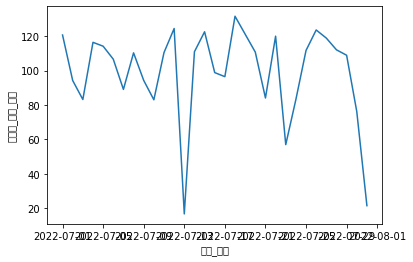

In [17]:
sns.lineplot(data=df4,x = '기준_날짜', y = '대여소_전체_건수')

<AxesSubplot:xlabel='온도', ylabel='대여소_전체_건수'>

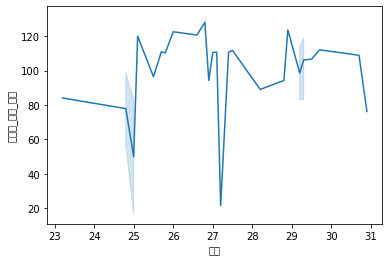

In [18]:
sns.lineplot(data=df4,x = '온도', y = '대여소_전체_건수')

<AxesSubplot:xlabel='기준_날짜', ylabel='온도'>

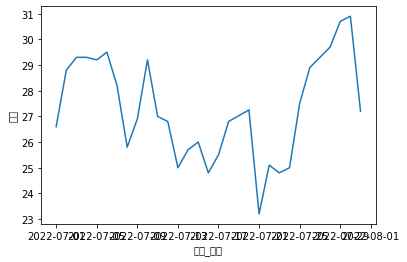

In [19]:
sns.lineplot(data=df4,x = '기준_날짜', y = '온도')

In [20]:
df.to_csv('따릉이.csv',encoding='euc-kr', index = False)